# Charge Time Machine Learning Algorithm Generation

## Table Of Contents

* [1.Reading Data](#read)
  * [1.1 Train-Test Split](#split)
  * [1.2 Data Normalization](#normal)
  * [1.3 Dataframe Variations](#dfs)


* [2.Data Analysis](#split)     


## Reading Data <a name="read"></a>

### Splitting the data <a name="split"></a>

In [1]:
import pandas as pd
import datetime as td
import  numpy as np
import datetime 
import datetime as dt
import math as ma
df = pd.read_csv('data/chargeML.csv')
df=df._convert(numeric=True)
df=df.dropna()
#df['date2'] =  pd.to_datetime(df['date2'])
#df.index.to_pydatetime() 
#df=df.date2.to_pydatetime() 
df['date2']=pd.to_datetime(df.date2)
#df['date2'] =  pd.to_datetime(df['date2'])
df["dayInMonth"] =df['date2'].dt.day
inData=dataSet=df
## Need to add a cos function for day of week

df["cos_week"] = np.cos(df["dayOfWeek"]/7*2*ma.pi)
df["sin_hour"]=np.sin(df["dayOfWeek"]/7*2*ma.pi)

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

splitOption = 1 # split per day of the month

#cutOffTestDate=2022.01.01
cutOffTestDate = datetime.datetime(2022, 3, 1)
testSet = dataSet.loc[(inData.date2 > cutOffTestDate), :]
mainSet = dataSet.loc[(inData.date2 <= cutOffTestDate), :]



### Normalising the data  <a name="normal"></a>

In [3]:
# Splitting the data by the 23rd of each month, to allow for subsequent hours to be used for predictions.
#Data can also be split by a single cut off date too

# Trainset is the untrasformed data
trainSet = dataSet.loc[(dataSet.dayInMonth > 0) & (dataSet.dayInMonth < 23), :]
validSet = dataSet.loc[(dataSet.dayInMonth >= 23) & (inData.date2 <= cutOffTestDate), :]

# Choosing a predcited column
predCol =['ActualWind']


# Saving these columns in case 
ogWindTrain = trainSet['ActualWind']
ogWindValid = validSet['ActualWind']


#Creating the trainDate column, so it can be re-added later
trainDate=trainSet.date2
validDate=validSet.date2
testDate=testSet.date2

# Removing the date Column
trainSet=trainSet.drop('date2',1)
validSet=validSet.drop('date2',1)
testSet=testSet.drop('date2',1)
trainSet=trainSet.drop('dayInMonth',1)
validSet=validSet.drop('dayInMonth',1)
testSet=testSet.drop('dayInMonth',1)
trainSet=trainSet.drop('dayOfWeek',1)
validSet=validSet.drop('dayOfWeek',1)
testSet=testSet.drop('dayOfWeek',1)
trainSet=trainSet.drop('dayOfYear',1)
validSet=validSet.drop('dayOfYear',1)
testSet=testSet.drop('dayOfYear',1)
trainSet=trainSet.drop('hour',1)
validSet=validSet.drop('hour',1)
testSet=testSet.drop('hour',1)



#When transforming the data in the future, we need to be able to transform the complete forecast,
# for all four stations at once
usedColsForecast=['dub_wddir','dub_wdsp','dub_temp','dub_msl',
    'don_wddir','don_wdsp','don_temp','don_msl',
    'cla_wddir','cla_wdsp','cla_temp','cla_msl',
    'cor_wddir','cor_wdsp','cor_temp','cor_msl']

# Two versions are saved, to allow for the transformed wind-vector columns to be used
usedColsForecastVec=['dub_wddir','dub_wdsp','dub_temp','dub_msl',
    'don_wddir','don_wdsp','don_temp','don_msl',
    'cla_wddir','cla_wdsp','cla_temp','cla_msl',
    'cor_wddir','cor_wdsp','cor_temp','cor_msl',
    'cos_dub_vec', 'sin_dub_vec',
    'cos_cor_vec', 'sin_cor_vec', 'cos_cla_vec', 
    'sin_cla_vec','cos_don_vec', 'sin_don_vec']

# Same as usecColsForecast, but includes time variables
allCols=['sin_day','sin_hour','cos_day','cos_hour',
    'dub_wddir','dub_wdsp','dub_temp','dub_msl',
    'don_wddir','don_wdsp','don_temp','don_msl',
    'cla_wddir','cla_wdsp','cla_temp','cla_msl',
    'cor_wddir','cor_wdsp','cor_temp','cor_msl']

# Same as usecColsForecast, but includes time variables
allCols_Vec=['dub_wddir','dub_wdsp','dub_temp','dub_msl',
    'don_wddir','don_wdsp','don_temp','don_msl',
    'cla_wddir','cla_wdsp','cla_temp','cla_msl',
    'cor_wddir','cor_wdsp','cor_temp','cor_msl',
    'cos_dub_vec', 'sin_dub_vec',
    'cos_cor_vec', 'sin_cor_vec', 'cos_cla_vec', 
    'sin_cla_vec','cos_don_vec', 'sin_don_vec']

usedColsSelect=['sin_day','sin_hour','cos_day','cos_hour',
                'dub_wddir','dub_wdsp','don_wdsp','cor_wdsp',
                'cla_wdsp','dub_msl','don_wdsp','cos_cor_wddir',
                'sin_cor_wddir','dub_temp','cos_dub_wddir','sin_dub_wddir']

usedColsBasic=['sin_day','sin_hour','cos_day','cos_hour',
               'dub_wddir','dub_wdsp','dub_msl',
              'cor_wddir']


usedColsBasicVec=['sin_day','sin_hour','cos_day','cos_hour',
               'sin_dub_wddir','cos_dub_wddir','dub_wdsp','dub_msl']


usedColsForecastExtra=['dub_wddir','dub_wdsp','dub_temp','dub_msl',
    'don_wddir','don_wdsp','don_temp','don_msl',
    'cla_wddir','cla_wdsp','cla_temp','cla_msl',
    'cor_wddir','cor_wdsp','cor_temp','cor_msl',
    'tip_wddir','tip_wdsp','tip_temp','tip_msl',
    'may_wddir','may_wdsp','may_temp','may_msl']

allColsExtra=['sin_day','sin_hour','cos_day','cos_hour',
    'dub_wddir','dub_wdsp','dub_temp','dub_msl',
    'don_wddir','don_wdsp','don_temp','don_msl',
    'cla_wddir','cla_wdsp','cla_temp','cla_msl',
    'cor_wddir','cor_wdsp','cor_temp','cor_msl',
    'tip_wddir','tip_wdsp','tip_temp','tip_msl',
    'may_wddir','may_wdsp','may_temp','may_msl']

##!!!! DELETE THIS LINE TO REVERSE
#allCols  = allColsExtra
#usedColsForecastExtra = usedColsForecastExtra

train_mean = trainSet.mean()
train_std = trainSet.std()


train_meanSave=train_mean[usedColsForecast]
train_stdSave =train_std[usedColsForecast]

# Saving columns which are used to transform data used in future predictive modelling
np.savetxt("./models/train_meanSave.csv", train_meanSave, delimiter=",")
np.savetxt("./models/train_stdSave.csv", train_meanSave, delimiter=",")

train_transformed = (trainSet - train_mean) / train_std
valid_transformed = (validSet - train_mean) / train_std
test_transformed = (testSet - train_mean) / train_std


train_meanSaveVec=train_mean[usedColsForecastVec]
train_stdSaveVec =train_std[usedColsForecastVec]

# Saving columns which are used to transform data used in future predictive modelling
np.savetxt("./models/train_meanSaveVec.csv", train_meanSave, delimiter=",")
np.savetxt("./models/train_stdSaveVec.csv", train_meanSave, delimiter=",")

#re-creating date-column
train_transformed['date2']=trainDate
valid_transformed['date2']=validDate
test_transformed['date2']=testDate

# Re-adding removed columns
train_transformed['hour']=train_transformed['date2'].dt.hour
train_transformed['dayOfWeek']=train_transformed['date2'].dt.day_of_week
train_transformed['dayOfYear']=train_transformed['date2'].dt.day_of_year
train_transformed["dayInMonth"] =train_transformed['date2'].dt.day
# Re-adding removed columns
valid_transformed['hour']=valid_transformed['date2'].dt.hour
valid_transformed['dayOfWeek']=valid_transformed['date2'].dt.day_of_week
valid_transformed['dayOfYear']=valid_transformed['date2'].dt.day_of_year
valid_transformed["dayInMonth"] =valid_transformed['date2'].dt.day
# Re-adding removed columns
test_transformed['hour']=test_transformed['date2'].dt.hour
test_transformed['dayOfWeek']=test_transformed['date2'].dt.day_of_week
test_transformed['dayOfYear']=test_transformed['date2'].dt.day_of_year
test_transformed["dayInMonth"] =test_transformed['date2'].dt.day

#Resetting the predicted  column to not be a transformed variable
train_transformed[predCol]=train_transformed[predCol]*train_std[predCol]+train_mean[predCol]
valid_transformed[predCol]=valid_transformed[predCol]*train_std[predCol]+train_mean[predCol]
test_transformed[predCol]=test_transformed[predCol]*train_std[predCol]+train_mean[predCol]
print("The mean of the predicted wind power is ",train_mean[predCol])
# Re-setting the names of the columns

testSet=test_transformed


y_trainWind = trainSet['ActualWind']
y_validWind = validSet['ActualWind']

#Adding date
trainSet['date2'] = trainDate
validSet['date2'] = validDate
testSet['date2'] = testDate

y_testWind = testSet[predCol]


The mean of the predicted wind power is  ActualWind    1443.843194
dtype: float64


/tmp/ipykernel_205743/2222124323.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainSet=trainSet.drop('date2',1)
/tmp/ipykernel_205743/2222124323.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  validSet=validSet.drop('date2',1)
/tmp/ipykernel_205743/2222124323.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  testSet=testSet.drop('date2',1)
/tmp/ipykernel_205743/2222124323.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainSet=trainSet.drop('dayInMonth',1)
/tmp/ipykernel_205743/2222124323.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword

## Dataframe Generation  <a name="dfs"></a>

In [4]:

# Creating dataframes
#Version 1:
X_trainAll = train_transformed[allCols]
X_validAll = valid_transformed[allCols]

X_trainAllVec = train_transformed[allCols_Vec]
X_validAllVec = test_transformed[allCols_Vec]


#Simplified Version:
X_trainBasic = train_transformed[usedColsBasic]
X_validBasic = valid_transformed[usedColsBasic]

# Adding a single layer
X_trainBasicVec = train_transformed[usedColsBasicVec]
X_validBasicVec = valid_transformed[usedColsBasicVec]

## Random forest generation

### Random Forest Reggresion model

In [5]:
from sklearn.ensemble import RandomForestRegressor

rrfAll=RandomForestRegressor(n_estimators=500,random_state = 42, max_depth=400, max_leaf_nodes=400)

rrfAll.fit(X_trainAll,y_trainWind)

RandomForestRegressor(max_depth=400, max_leaf_nodes=400, n_estimators=500,
                      random_state=42)

In [6]:
validSet[['date2']]

,date2
528,2019-04-23 00:00:00
529,2019-04-23 01:00:00
530,2019-04-23 02:00:00
531,2019-04-23 03:00:00
532,2019-04-23 04:00:00
...,...
25497,2022-02-28 19:00:00
25498,2022-02-28 20:00:00
25499,2022-02-28 21:00:00
25500,2022-02-28 22:00:00


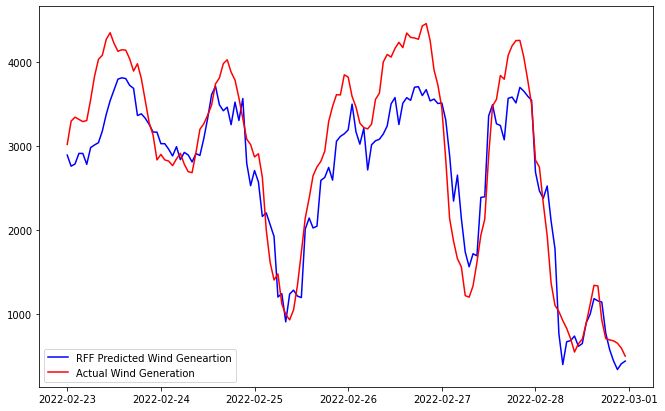

In [7]:
y_predRRFAll=rrfAll.predict(X_validAll)
y_valid = validSet[predCol]
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

plt.plot(validSet['date2'][-6*24:],y_predRRFAll[-6*24:],color = 'blue',label = 'RFF Predicted Wind Geneartion')
plt.plot(validSet['date2'][-6*24:],y_valid[-6*24:],color = 'red',label = 'Actual Wind Generation')
plt
fig = plt.gcf()
plt.legend()
#plt.size(7,7)
fig.set_size_inches(11, 7)

fig.savefig('MLImages/rForestForecast2.png', dpi=100)

In [8]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_predRRFAll))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_predRRFAll))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_predRRFAll)))

Mean Absolute Error: 315.9708645752691
Mean Squared Error: 171888.2773428974
Root Mean Squared Error: 414.59411156322204


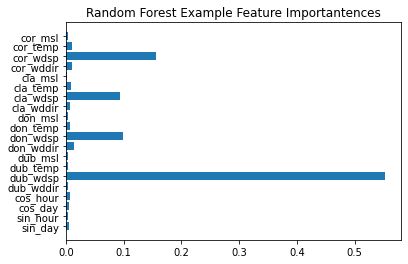

In [9]:
plt.barh(X_validAll.columns, rrfAll.feature_importances_)
plt.title("Random Forest Example Feature Importantences")
plt.savefig("MLImages/RforestImportances1.png")
plt.show()

In [10]:
rrfBasic=RandomForestRegressor(n_estimators=200,random_state = 42)
rrfBasic.fit(X_trainBasic,y_trainWind)

RandomForestRegressor(n_estimators=200, random_state=42)

In [11]:
y_predRffBasic=rrfBasic.predict(X_validBasic)

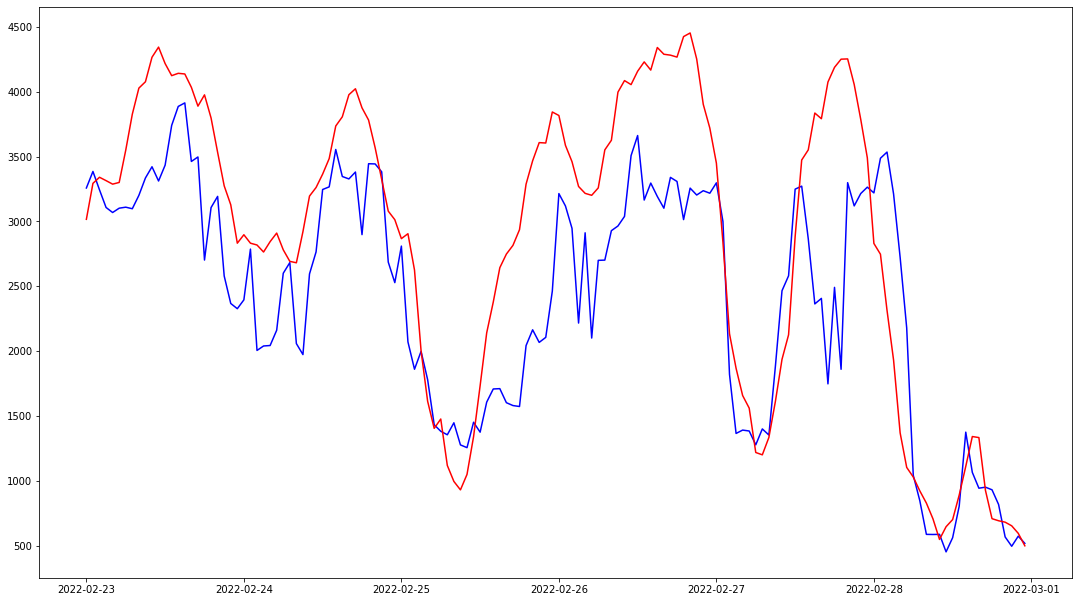

In [12]:

import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

plt.plot(validSet['date2'][-6*24:],y_predRffBasic[-6*24:],color = 'blue')
plt.plot(validSet['date2'][-6*24:],y_valid[-6*24:],color = 'red')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('randomForestVec.png', dpi=100)

In [13]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid,y_predRffBasic))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_predRffBasic))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_predRffBasic)))

Mean Absolute Error: 504.54523943036736
Mean Squared Error: 428894.3659415374
Root Mean Squared Error: 654.9002717525299


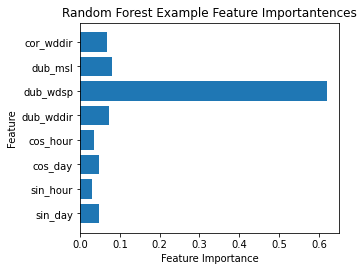

<Figure size 18000x7200 with 0 Axes>

In [14]:
fig1 = plt.gcf()
plt.barh(X_validBasic.columns, rrfBasic.feature_importances_)
plt.title("Random Forest Example Feature Importantences")

plt.xlabel("Feature Importance")
plt.ylabel("Feature")

plt.subplots_adjust(bottom=0.15)
plt.subplots_adjust(left=0.3)

plt.figure(figsize=(250,100))
fig1.savefig("MLImages/RforestImportancesBasic.png", dpi=100)
plt.show()

This:-
rrf=RandomForestRegressor(n_estimators=100,random_state = 42, max_depth=100, max_leaf_nodes=100)

Yields this:-
Mean Absolute Error: 465.79800324008335
Mean Squared Error: 332345.30211887945
Root Mean Squared Error: 576.4939740525302

This:-
rrf=RandomForestRegressor(n_estimators=100,random_state = 42, max_depth=100, max_leaf_nodes=100)

Yields this:-
Mean Absolute Error: 479.4909188704617
Mean Squared Error: 362932.07708576124
Root Mean Squared Error: 602.438442569663

## Creating a Baseline Model Using Tensorflow

In [15]:
import tensorflow_decision_forests as tfdf

2022-08-03 19:23:26.424941: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-03 19:23:26.424998: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [16]:
trainSetTF=trainSet
validSetTF=validSet
testSetTF=testSet

In [17]:
trainSet[allCols+predCol]

,sin_day,sin_hour,cos_day,cos_hour,dub_wddir,dub_wdsp,dub_temp,dub_msl,don_wddir,don_wdsp,...,don_msl,cla_wddir,cla_wdsp,cla_temp,cla_msl,cor_wddir,cor_wdsp,cor_temp,cor_msl,ActualWind
358,0.972118,0.000000,0.972118,-0.500000,130.0,15.0,8.1,1012.0,150.0,16.0,...,1011.7,120.0,10.0,8.4,1009.1,200.0,8.0,9.4,1009.1,2231.0
359,0.972118,0.000000,0.972118,-0.258819,140.0,14.0,7.9,1012.6,160.0,17.0,...,1012.1,120.0,9.0,8.2,1009.6,190.0,7.0,9.3,1009.8,1838.0
360,0.967938,0.781831,0.967938,0.000000,120.0,12.0,7.6,1012.8,150.0,20.0,...,1012.8,100.0,8.0,7.6,1010.4,190.0,7.0,9.1,1010.2,1279.0
361,0.967938,0.781831,0.967938,0.258819,120.0,9.0,7.7,1013.1,140.0,19.0,...,1013.0,110.0,8.0,7.9,1010.8,170.0,5.0,8.9,1010.9,913.0
362,0.967938,0.781831,0.967938,0.500000,120.0,8.0,7.4,1012.9,140.0,18.0,...,1013.1,120.0,8.0,7.6,1011.0,180.0,6.0,8.3,1011.5,852.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27489,0.642055,-0.781831,0.642055,-0.866025,220.0,8.0,12.7,1005.0,250.0,14.0,...,1001.8,240.0,11.0,12.4,1005.9,250.0,14.0,11.8,1008.3,1877.0
27490,0.642055,-0.781831,0.642055,-0.707107,230.0,8.0,12.1,1005.1,250.0,12.0,...,1001.7,260.0,11.0,11.6,1006.3,250.0,13.0,11.5,1008.3,1585.0
27491,0.642055,-0.781831,0.642055,-0.500000,230.0,10.0,11.0,1004.9,220.0,12.0,...,1001.6,260.0,11.0,11.4,1006.6,250.0,13.0,11.4,1008.2,1322.0
27492,0.642055,-0.781831,0.642055,-0.258819,240.0,12.0,10.2,1004.6,210.0,14.0,...,1001.8,260.0,10.0,11.1,1006.7,280.0,11.0,10.9,1008.1,1326.0


In [18]:
# Running into difficulty converting these columns, so I reset the value of X_train to include ActualGenerationMW
label = predCol[0]
'''
y_trainTF = tfdf.keras.pd_dataframe_to_tf_dataset(y_trainTF, label=label, task=tfdf.keras.Task.REGRESSION)
y_validTF = tfdf.keras.pd_dataframe_to_tf_dataset(y_validTF, label=label, task=tfdf.keras.Task.REGRESSION)
y_testTF = tfdf.keras.pd_dataframe_to_tf_dataset(y_testTF, label=label, task=tfdf.keras.Task.REGRESSION)
'''

X_trainAllTF = tfdf.keras.pd_dataframe_to_tf_dataset(trainSet[allCols+predCol], label=label, task=tfdf.keras.Task.REGRESSION)

X_validAllTF = tfdf.keras.pd_dataframe_to_tf_dataset(validSetTF[allCols+predCol], label=label, task=tfdf.keras.Task.REGRESSION)

/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core.py:2542: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features_dataframe = dataframe.drop(label, 1)
2022-08-03 19:23:29.323700: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-03 19:23:29.323755: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-03 19:23:29.323788: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (x20217366): /proc/driver/nvidia/version does not exist
/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core.py:2542: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except

In [19]:
#Using keras
model_7 = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)

# Train the model.
model_7.fit(x=X_trainAllTF)

Use /tmp/tmp0zg8h_ku as temporary training directory
Reading training dataset...
Training dataset read in 0:00:09.644619. Found 19674 examples.
Training model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmp0zg8h_ku/model/ with prefix aac3761c666b4b92
[INFO abstract_model.cc:1246] Engine "RandomForestOptPred" built
[INFO kernel.cc:1022] Use fast generic engine


Model trained in 0:00:25.821660
Compiling model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [20]:
### Another TF model


feature_list = []
for col in usedColsBasicVec:
    feature_list.append(tfdf.keras.FeatureUsage(name=col,semantic=tfdf.keras.FeatureSemantic.NUMERICAL))


model8 = tfdf.keras.RandomForestModel(features = feature_list, task = tfdf.keras.Task.REGRESSION,
    exclude_non_specified_features=True,
    num_trees=1000, max_depth=16,
    split_axis="SPARSE_OBLIQUE",categorical_algorithm="RANDOM",
    missing_value_policy='RANDOM_LOCAL_IMPUTATION',
    sparse_oblique_normalization='STANDARD_DEVIATION',
    compute_oob_variable_importances=True,
    winner_take_all=False)
                                                

#model8.compile(metrics=["Accuracy"])


Use /tmp/tmphuqk8hem as temporary training directory


In [21]:
from wurlitzer import sys_pipes
with sys_pipes():
    model8.fit(X_trainAllTF)

Reading training dataset...


ValueError: in user code:

    File "/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core.py", line 1527, in _consumes_training_examples_until_eof  *
        num_examples += self.train_step(data)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core.py", line 1002, in _method_wrapper  *
        result = method(self, *args, **kwargs)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core.py", line 1003, in train_step  *
        return self.collect_data_step(data, is_training_example=True)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core.py", line 1002, in _method_wrapper  *
        result = method(self, *args, **kwargs)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core.py", line 1096, in collect_data_step  *
        semantics = tf_core.infer_semantic(
    File "/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow_decision_forests/tensorflow/core.py", line 1236, in infer_semantic  *
        raise ValueError(

    ValueError: Manual semantic "sin_dub_wddir" was not found among the input features: dict_keys(['sin_day', 'sin_hour', 'cos_day', 'cos_hour', 'dub_wddir', 'dub_wdsp', 'dub_temp', 'dub_msl', 'don_wddir', 'don_wdsp', 'don_temp', 'don_msl', 'cla_wddir', 'cla_wdsp', 'cla_temp', 'cla_msl', 'cor_wddir', 'cor_wdsp', 'cor_temp', 'cor_msl'])


In [22]:
# Not sure what test_ds should be
'''
# Evaluate the model on the test dataset.
model8.compile(metrics=["mse"])
evaluation = model8.evaluate(test_ds, return_dict=True)

print(evaluation)
print()
print(f"MSE: {evaluation['mse']}")
print(f"RMSE: {math.sqrt(evaluation['mse'])}")
#print(f"MAE: {evaluation['mae']}")
'''

'\n# Evaluate the model on the test dataset.\nmodel8.compile(metrics=["mse"])\nevaluation = model8.evaluate(test_ds, return_dict=True)\n\nprint(evaluation)\nprint()\nprint(f"MSE: {evaluation[\'mse\']}")\nprint(f"RMSE: {math.sqrt(evaluation[\'mse\'])}")\n#print(f"MAE: {evaluation[\'mae\']}")\n'

Not sure if I'll get much better then above

## Tenserflow Setup

In [23]:
train_df_with_predCol = train_transformed[allCols+predCol]
val_df_with_predCol = valid_transformed[allCols+predCol]
test_df_with_predCol= test_transformed[allCols+predCol]

In [24]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df_with_predCol, val_df=val_df_with_predCol , test_df=test_df_with_predCol,
               label_columns=None):
    # Store the raw data.
    self.train_df_with_predCol = train_df_with_predCol
    self.val_df_with_predCol = val_df_with_predCol
    self.test_df_with_predCol= test_df_with_predCol

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df_with_predCol.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])



In [25]:
@property
def train(self):
  return self.make_dataset(self.train_df_with_predCol)

@property
def val(self):
  return self.make_dataset(self.val_df_with_predCol)

@property
def test(self):
  return self.make_dataset(self.test_df_with_predCol)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example



In [26]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [27]:
def plot(self, model=None, plot_col=predCol[0], max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot


# Baseline Model

In [28]:
import tensorflow as tf

In [29]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [30]:
val_performance = {}
performance = {}

In [31]:
'''
!!!!! Remove below
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
#train_df = df[0:int(n*0.7)]
#val_df = df[int(n*0.7):int(n*0.9)]
#test_df = df[int(n*0.9):]


num_features = df.shape[1]
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=predCol)
single_step_window



class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

baseline = Baseline(label_index=column_indices[predCol[0]])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)


wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=[predCol[0]])

wide_window


print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)
wide_window.plot(baseline)

'''

"\n!!!!! Remove below\ncolumn_indices = {name: i for i, name in enumerate(df.columns)}\n\nn = len(df)\n#train_df = df[0:int(n*0.7)]\n#val_df = df[int(n*0.7):int(n*0.9)]\n#test_df = df[int(n*0.9):]\n\n\nnum_features = df.shape[1]\nsingle_step_window = WindowGenerator(\n    input_width=1, label_width=1, shift=1,\n    label_columns=predCol)\nsingle_step_window\n\n\n\nclass Baseline(tf.keras.Model):\n  def __init__(self, label_index=None):\n    super().__init__()\n    self.label_index = label_index\n\n  def call(self, inputs):\n    if self.label_index is None:\n      return inputs\n    result = inputs[:, :, self.label_index]\n    return result[:, :, tf.newaxis]\n\nbaseline = Baseline(label_index=column_indices[predCol[0]])\n\nbaseline.compile(loss=tf.keras.losses.MeanSquaredError(),\n                 metrics=[tf.keras.metrics.MeanAbsoluteError()])\n\nval_performance = {}\nperformance = {}\nval_performance['Baseline'] = baseline.evaluate(single_step_window.val)\nperformance['Baseline'] = ba

## Convolutional Neural Network


## Artificial Neural Networks

In [32]:
import tensorflow as tf
ann = tf.keras.models.Sequential([            
          tf.keras.layers.Dense(units=111, activation='relu', name="Layer_1"),
          tf.keras.layers.Dropout(0.1), #drop-out layer to avoid overfit
          tf.keras.layers.Dense(units=111, activation='relu', name="Layer_2"),
          tf.keras.layers.Dropout(0.1),
          tf.keras.layers.Dense(units=111, activation='relu', name="Layer_3"),
          tf.keras.layers.Dropout(0.1),
          tf.keras.layers.Dense(units=10, activation='relu', name="Layer_4"),
          tf.keras.layers.Dense(units=1, name="output_layer")
          ])

ann.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
            optimizer=tf.keras.optimizers.Adam(lr=0.00002),
            metrics=["mae"])

/home/ubuntu/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:
#copying stuff from document...!!!!!!
epochs=60
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

#sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
ann.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
            optimizer=tf.keras.optimizers.Adam(lr=0.00002),
            metrics=["mae"])

In [34]:
y_trainWind= trainSet.ActualWind

In [35]:
ann.fit(X_trainAll,y_trainWind, batch_size=20, epochs=100)

Epoch 1/100
984/984 [==============================] - 5s 4ms/step - loss: 1438.6100 - mae: 1438.6100
Epoch 2/100
984/984 [==============================] - 4s 4ms/step - loss: 1352.2112 - mae: 1352.2112
Epoch 3/100
984/984 [==============================] - 4s 4ms/step - loss: 1071.5311 - mae: 1071.5312
Epoch 4/100
984/984 [==============================] - 4s 4ms/step - loss: 723.9332 - mae: 723.9332
Epoch 5/100
984/984 [==============================] - 4s 4ms/step - loss: 602.6954 - mae: 602.6954
Epoch 6/100
984/984 [==============================] - 4s 4ms/step - loss: 559.9494 - mae: 559.9494
Epoch 7/100
984/984 [==============================] - 4s 4ms/step - loss: 529.2380 - mae: 529.2380
Epoch 8/100
984/984 [==============================] - 4s 4ms/step - loss: 507.3113 - mae: 507.3113
Epoch 9/100
984/984 [==============================] - 4s 4ms/step - loss: 490.2186 - mae: 490.2186
Epoch 10/100
984/984 [==============================] - 4s 4ms/step - loss: 478.4695 - mae: 47

984/984 [==============================] - 4s 4ms/step - loss: 339.2863 - mae: 339.2863
Epoch 83/100
984/984 [==============================] - 4s 4ms/step - loss: 336.7037 - mae: 336.7037
Epoch 84/100
984/984 [==============================] - 4s 4ms/step - loss: 336.8314 - mae: 336.8314
Epoch 85/100
984/984 [==============================] - 4s 4ms/step - loss: 337.2306 - mae: 337.2306
Epoch 86/100
984/984 [==============================] - 4s 4ms/step - loss: 337.1981 - mae: 337.1981
Epoch 87/100
984/984 [==============================] - 4s 4ms/step - loss: 337.6249 - mae: 337.6249
Epoch 88/100
984/984 [==============================] - 4s 4ms/step - loss: 336.5013 - mae: 336.5013
Epoch 89/100
984/984 [==============================] - 4s 4ms/step - loss: 334.4635 - mae: 334.4635
Epoch 90/100
984/984 [==============================] - 4s 4ms/step - loss: 335.4904 - mae: 335.4904
Epoch 91/100
984/984 [==============================] - 4s 4ms/step - loss: 335.3151 - mae: 335.3151
Epo

In [36]:
y_predANN=ann.predict(X_validAll)

221/221 [==============================] - 1s 2ms/step


In [37]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_predANN))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_predANN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_predANN)))

Mean Absolute Error: 324.52599775059315
Mean Squared Error: 194456.15567728877
Root Mean Squared Error: 440.9718309340051


For lr=0.002 and  batch_size=200, epochs=100)

Mean Absolute Error: 470.42779251935326
Mean Squared Error: 353878.8971401352
Root Mean Squared Error: 594.877211817813

For lr=0.0002 and  batch_size=200, epochs=100)
Mean Absolute Error: 478.03476671201486
Mean Squared Error: 364369.589799041
Root Mean Squared Error: 603.6303420132565

For lr=0.0002 and  batch_size=200, epochs=150)
Mean Absolute Error: 470.0360041216103
Mean Squared Error: 354797.59158343874
Root Mean Squared Error: 595.648882802141

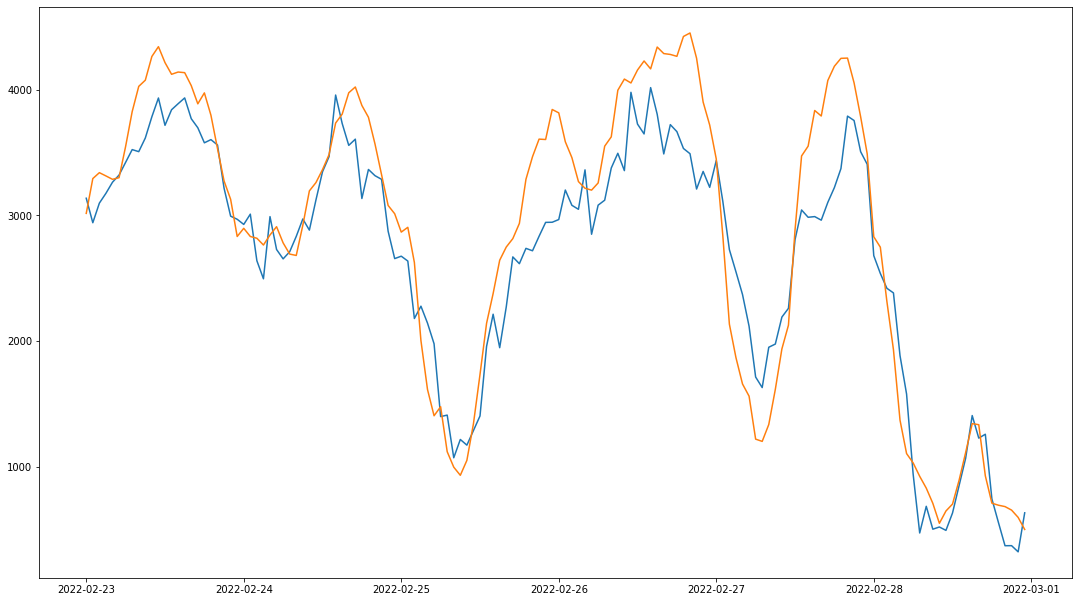

In [38]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

plt.plot(validSet['date2'][-6*24:],y_predANN[-6*24:])
plt.plot(validSet['date2'][-6*24:],y_valid[-6*24:])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

In [39]:
#plt.barh(X_validAll.columns, ann.feature_importances_)

### Single hour ANN Forecasting

In [40]:
ann1 = tf.keras.models.Sequential([            
        tf.keras.layers.Dense(units=120, activation='relu', name="Layer_1"),
        tf.keras.layers.Dropout(0.1), #drop-out layer to avoid overfit
        tf.keras.layers.Dense(units=120, activation='relu', name="Layer_2"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(units=120, activation='relu', name="Layer_3"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(units=10, activation='relu', name="Layer_4"),
        tf.keras.layers.Dense(units=1, name="output_layer")
        ])

ann1.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
          optimizer=tf.keras.optimizers.Adam(lr=0.002),
          metrics=["mae"])



sinTrain1=train_transformed[allCols]
y_trainSingle=train_transformed[predCol]

sinValid1=valid_transformed[allCols]
y_validSingle=valid_transformed[predCol]

history = ann1.fit(sinTrain1, y_trainSingle, epochs = 27, validation_data=(sinValid1,y_validSingle), verbose=0)
# history = ann.fit(X_train_normal, y_trainWind epochs = 20, validation_data=(X_valid_normal,y_valid), callbacks=[es])


/home/ubuntu/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


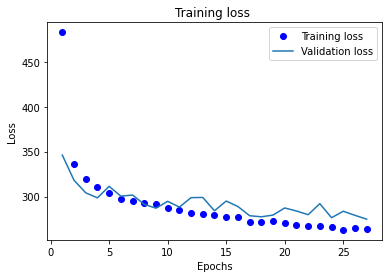

In [41]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss, label='Validation loss')
plt.title('Training loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
from sklearn import metrics

y_predS=ann1.predict(sinValid1)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_validSingle, y_predS))
print('Mean Squared Error:', metrics.mean_squared_error(y_validSingle, y_predS))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_validSingle, y_predS)))

221/221 [==============================] - 1s 2ms/step
Mean Absolute Error: 274.86693730442875
Mean Squared Error: 141704.45984538607
Root Mean Squared Error: 376.4365283090711


In [43]:
ann1.save('models/ann_modelS')

INFO:tensorflow:Assets written to: models/ann_modelS/assets


INFO:tensorflow:Assets written to: models/ann_modelS/assets


### Using a different set of columns 

In [44]:
ann1 = tf.keras.models.Sequential([            
        tf.keras.layers.Dense(units=120, activation='relu', name="Layer_1"),
        tf.keras.layers.Dropout(0.1), #drop-out layer to avoid overfit
        tf.keras.layers.Dense(units=120, activation='relu', name="Layer_2"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(units=120, activation='relu', name="Layer_3"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(units=10, activation='relu', name="Layer_4"),
        tf.keras.layers.Dense(units=1, name="output_layer")
        ])

ann1.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
          optimizer=tf.keras.optimizers.Adam(lr=0.002),
          metrics=["mae"])





y_trainSingle=train_transformed [predCol]
y_validSingle=valid_transformed [predCol]

sinTrain1=train_transformed[allCols_Vec]
sinValid1=valid_transformed [allCols_Vec]


history = ann1.fit(sinTrain1, y_trainSingle, epochs = 30, validation_data=(sinValid1,y_validSingle), verbose=0)
# history = ann.fit(X_train_normal, y_trainWind epochs = 20, validation_data=(X_valid_normal,y_valid), callbacks=[es])


/home/ubuntu/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


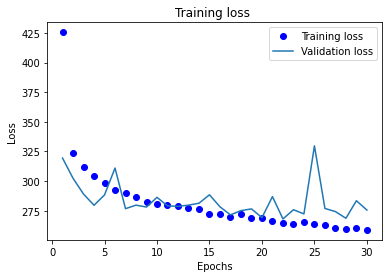

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss, label='Validation loss')
plt.title('Training loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
ann.save('models/ann_model')

INFO:tensorflow:Assets written to: models/ann_model/assets


INFO:tensorflow:Assets written to: models/ann_model/assets


## Muliple hour input Forecasting

Below from https://www.tensorflow.org/tutorials/structured_data/time_series

In [47]:
import IPython
import IPython.display

In [48]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=0,
                     label_columns=predCol[0])
w2

Total window size: 6
Input indices: [0 1 2 3 4 5]
Label indices: [5]
Label column name(s): ActualWind

In [49]:
# Redefining split window to work with a single window
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    if type(self.label_columns) == str:
        name= self.label_columns
        labels = tf.stack(labels[:, :, self.column_indices[name]])
        labels = tf.expand_dims(labels,axis =0) 
    else:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)
        labels.set_shape([None, self.label_width, None])

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])


  return inputs, labels

WindowGenerator.split_window = split_window


In [50]:


# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df_with_predCol[:w2.total_window_size]),
                           np.array(train_df_with_predCol[100:100+w2.total_window_size]),
                           np.array(train_df_with_predCol[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 6, 21)
Inputs shape: (3, 6, 21)
Labels shape: (1, 3, 1)


In [51]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=0,
    label_columns=predCol[0])

conv_window

Total window size: 3
Input indices: [0 1 2]
Label indices: [2]
Label column name(s): ActualWind

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

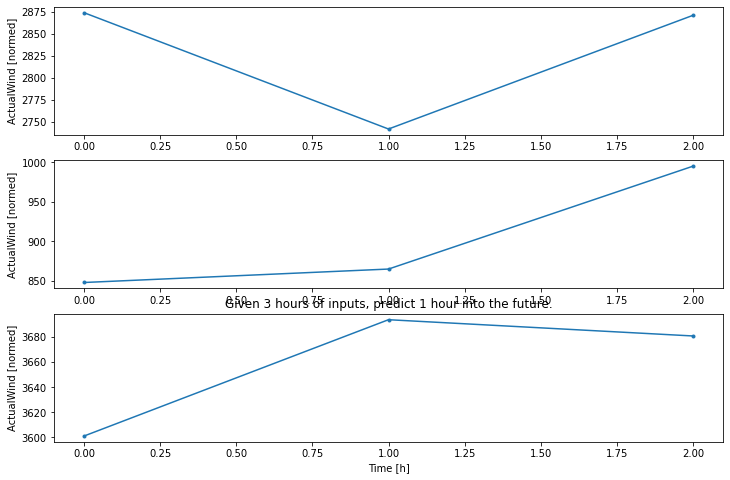

In [52]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [53]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience,mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

### Multi-step dense model

In [54]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [55]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

221/221 [==============================] - 1s 5ms/step - loss: 1177576.3750 - mean_absolute_error: 910.0494


### Multi hour ANN Forecasting - conv_model

In [56]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,kernel_size=(CONV_WIDTH,),activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [57]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

221/221 [==============================] - 1s 5ms/step - loss: 1183521.8750 - mean_absolute_error: 907.7927


In [58]:
conv_window.train

<MapDataset element_spec=(TensorSpec(shape=(None, 3, 21), dtype=tf.float32, name=None), TensorSpec(shape=(1, None, None), dtype=tf.float32, name=None))>

In [59]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience,mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
  print(window.train)
  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [60]:
train_transformed 
train_df_with_predCol = train_transformed[allCols+predCol]
val_df_with_predCol = valid_transformed[allCols+predCol]
test_df_with_predCol= test_transformed[allCols+predCol]

In [61]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df_with_predCol, val_df=val_df_with_predCol, test_df=test_df_with_predCol,
               label_columns=None):
    # Store the raw data.
    self.train_df_with_predCol = train_df_with_predCol
    self.val_df_with_predCol = val_df_with_predCol
    self.test_df_with_predCol= test_df_with_predCol

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df_with_predCol.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]
    print("self.input_indices are given by ",self.input_indices)
    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

##----------------------->
CONV_WIDTH = 2
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=0,
    shift=0,
    label_columns=predCol)

conv_window

##----------------------->

@property
def train(self):
  return self.make_dataset(self.train_df_with_predCol)


@property
def trainX(self):
  return self.make_dataset(self.train_df_with_predColX)

@property
def trainY(self):
  return self.make_dataset(self.train_df_with_predColY)


@property
def val(self):
  return self.make_dataset(self.val_df_with_predCol)

@property
def valX(self):
  return self.make_dataset(self.val_df_with_predColX)

@property
def valY(self):
  return self.make_dataset(self.val_df_with_predColY)

@property
def test(self):
  return self.make_dataset(self.test_df_with_predCol)

@property
def testX(self):
  return self.make_dataset(self.test_df3X)

@property
def testY(self):
  return self.make_dataset(self.test_df3Y)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train

WindowGenerator.val = val


WindowGenerator.test = test



WindowGenerator.example = example
###================================>

def split_window(self, features):
    print("self.input_slice is ",self.input_slice)
    print("self.labels_slice is ",self.labels_slice)
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    print("labels are given by", labels)
    print("inputs are given by", inputs)

    '''if self.label_columns is not None:
        labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)'''

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    print("labels are now given by", labels)
    print("inputs are now given by", inputs)
    return inputs, labels

WindowGenerator.split_window = split_window

###================================>

def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    print("Data is  given by",data.shape)
    
    inputData=data[:,:20]
    targets=data[:,20:]
    print("Input data is given by", inputData.shape)
    print("targets are given by",targets.shape)

    ds = tf.keras.utils.timeseries_dataset_from_array(
        inputData,
        targets,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        batch_size=32,)
    print("ds is given by ",ds)
    #ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

###================================>
#!!!! Try increasing this number
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience,mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
  print(window.train)
  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

###================================>

conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,kernel_size=(CONV_WIDTH-1,),activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])
###================================>

history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

Data is  given by (7053, 21)
Input data is given by (7053, 20)
targets are given by (7053, 1)
ds is given by  <BatchDataset element_spec=(TensorSpec(shape=(None, None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
221/221 [==============================] - 2s 8ms/step - loss: 259259.3594 - mean_absolute_error: 384.0193
Data is  given by (2207, 21)
Input data is given by (2207, 20)
targets are given by (2207, 1)
ds is given by  <BatchDataset element_spec=(TensorSpec(shape=(None, None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


#### Generating basic plots

Data is  given by (7053, 21)
Input data is given by (7053, 20)
targets are given by (7053, 1)
ds is given by  <BatchDataset element_spec=(TensorSpec(shape=(None, None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
221/221 [==============================] - 2s 8ms/step


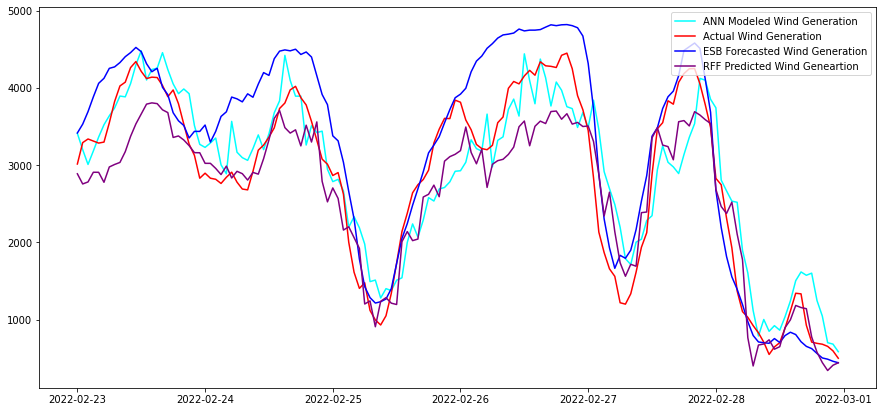

In [62]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

y_predRFF=rrfAll.predict(X_validAll)

#y_valid =        val_df[predCol].iloc[2:]
#y_forecasted = val_df['ForecastWind'].iloc[2:]


y_valid =        validSet[predCol]
y_forecasted = validSet['ForecastWind']



y_predAr=conv_model.predict(conv_window.val)
y_predANNMulti=y_predAr[:,0]
y_forecast = validSet.ForecastWind


y_valid=val_df_with_predCol[predCol]
#og here


plt.plot(validSet['date2'][-6*24:],y_predANNMulti[-6*24:],color = 'cyan',label = 'ANN Modeled Wind Generation')
plt.plot(validSet['date2'][-6*24:],y_valid[-6*24:],color = 'red',label = 'Actual Wind Generation')
plt.plot(validSet['date2'][-6*24:],y_forecast[-6*24:],color = 'blue', label = 'ESB Forecasted Wind Generation')
plt.plot(validSet['date2'][-6*24:],y_predRFF[-6*24:],color = 'purple',label = 'RFF Predicted Wind Geneartion')


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.legend(loc=1)
fig = plt.gcf()
fig.set_size_inches(15, 7)

fig.savefig('MLImages/ModelWeekDisplay.png', dpi=100)

In [63]:
from sklearn import metrics 
from sklearn.metrics import r2_score
#og stuff
y_valid =        validSet.ForecastWind#.iloc[2:]
y_forecasted = validSet.ActualWind#.iloc[2:]

MAEAN2=metrics.mean_absolute_error(y_valid, y_predANN)
print("For the simplified ANN we have the following:-")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_predANN))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_predANN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_predANN)))
print('Test r2_score:', r2_score(y_valid, y_predANN))
r2ANN = r2_score(y_valid, y_predANN)

y_valid2 = validSet['ActualWind']
print('\n')

MAERandomForest=metrics.mean_absolute_error(y_valid2, y_predRFF)
print("For the Random Forest Model we have the following:-")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid2, y_predRFF))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid2, y_predRFF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid2, y_predRFF)))
print('Test r2_score:', r2_score(y_valid,y_predRFF))
r2RFF=r2_score(y_valid,y_predRFF)

MAERFF=metrics.mean_absolute_error(y_valid, y_forecasted)
print('\n')
print("For the ESB model we have the following:-")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_forecasted))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_forecasted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_forecasted)))
print('Test r2_score:', r2_score(y_valid,y_forecasted))
r2For=r2_score(y_valid,y_forecasted)

MAEANN=metrics.mean_absolute_error(y_valid2[1:], y_predANNMulti)

print('\n')
print("For the tensorflow mutliple hour ANN we have the following:-")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid2[1:], y_predANNMulti))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid2[1:], y_predANNMulti))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid2[1:], y_predANNMulti)))
print('Test r2_score:', r2_score(y_valid2[1:],y_predANNMulti))

r2Mul=r2_score(y_valid2[1:],y_predANNMulti)



For the simplified ANN we have the following:-
Mean Absolute Error: 385.2676779878033
Mean Squared Error: 273364.98666617606
Root Mean Squared Error: 522.8431759774397
Test r2_score: 0.809887342745659


For the Random Forest Model we have the following:-
Mean Absolute Error: 315.9708645752691
Mean Squared Error: 171888.2773428974
Root Mean Squared Error: 414.59411156322204
Test r2_score: 0.8122731023878086


For the ESB model we have the following:-
Mean Absolute Error: 260.7279171983553
Mean Squared Error: 166827.43626825465
Root Mean Squared Error: 408.44514474804896
Test r2_score: 0.8839792630406702


For the tensorflow mutliple hour ANN we have the following:-
Mean Absolute Error: 401.1364759292646
Mean Squared Error: 278122.23759310856
Root Mean Squared Error: 527.372958723813
Test r2_score: 0.749937436370725


r2 - multi for 2 layer ANN with 100 epochs
Test r2_score: 0.7951716604472314

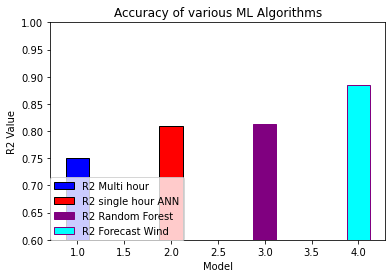

In [64]:
import numpy as np
import matplotlib.pyplot as plt




width = 0.25


plt.bar(x = 1, height = r2Mul, color = 'b', width = width, edgecolor = 'black',label='R2 Multi hour')
plt.bar(x = 2, height = r2ANN, color = 'r', width = width, edgecolor = 'black',label='R2 single hour ANN')
plt.bar(x = 3, height = r2RFF, color = 'purple', width = width, edgecolor = 'purple',label='R2 Random Forest')

plt.bar(x = 4, height = r2For, color = 'cyan', width = width, edgecolor = 'purple',label='R2 Forecast Wind')

plt.ylim(0.6,1.0)
plt.xlabel("Model")
plt.ylabel("R2 Value")
plt.title("Accuracy of various ML Algorithms")
plt.figsize=(8, 6)

# plt.grid(linestyle='--')
#plt.xticks(r + width/2,['2018','2019','2020','2021'])
plt.legend(loc=[0,0])
plt.savefig('MLImages/R2AccuracyScores.png')
plt.show()


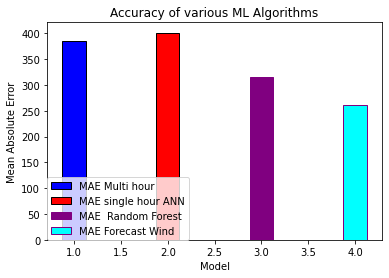

In [65]:
import numpy as np
import matplotlib.pyplot as plt




width = 0.25


plt.bar(x = 1, height = MAEAN2, color = 'b', width = width, edgecolor = 'black',label='MAE Multi hour')
plt.bar(x = 2, height = MAEANN, color = 'r', width = width, edgecolor = 'black',label='MAE single hour ANN')
plt.bar(x = 3, height = MAERandomForest, color = 'purple', width = width, edgecolor = 'purple',label='MAE  Random Forest')

plt.bar(x = 4, height = MAERFF, color = 'cyan', width = width, edgecolor = 'purple',label='MAE Forecast Wind')

plt.xlabel("Model")
plt.ylabel("Mean Absolute Error")
plt.title("Accuracy of various ML Algorithms")

# plt.grid(linestyle='--')
#plt.xticks(r + width/2,['2018','2019','2020','2021'])
plt.legend(loc=[0,0])
plt.savefig('MLImages/AccuracyScores.png')
plt.show()



In [66]:
conv_model.save('models/conv_model')

INFO:tensorflow:Assets written to: models/conv_model/assets


INFO:tensorflow:Assets written to: models/conv_model/assets


#### Can I get a Hell yeah
_Helia_

## Wider window

In [67]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df_with_predCol, val_df=val_df_with_predCol, test_df=test_df_with_predCol,
               label_columns=None):
    # Store the raw data.
    self.train_df_with_predCol = train_df_with_predCol
    self.val_df_with_predCol = val_df_with_predCol
    self.test_df_with_predCol= test_df_with_predCol

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df_with_predCol.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]
    print("self.input_indices are given by ",self.input_indices)
    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)#[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

##----------------------->
CONV_WIDTH = 2
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=0,
    shift=0,
    label_columns=predCol)


##----------------------->

@property
def train(self):
  return self.make_dataset(self.train_df_with_predCol)


@property
def trainX(self):
  return self.make_dataset(self.train_df_with_predColX)

@property
def trainY(self):
  return self.make_dataset(self.train_df_with_predColY)


@property
def val(self):
  return self.make_dataset(self.val_df_with_predCol)

@property
def valX(self):
  return self.make_dataset(self.val_df_with_predColX)

@property
def valY(self):
  return self.make_dataset(self.val_df_with_predColY)

@property
def test(self):
  return self.make_dataset(self.test_df_with_predCol)

@property
def testX(self):
  return self.make_dataset(self.test_df3X)

@property
def testY(self):
  return self.make_dataset(self.test_df3Y)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  #result = getattr(self, '_example', None)
  result = None
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train

WindowGenerator.val = val


WindowGenerator.test = test



WindowGenerator.example = example
###================================>

def split_window(self, features):
    print("self.input_slice is ",self.input_slice)
    print("self.labels_slice is ",self.labels_slice)
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    print("labels are given by", labels)
    print("inputs are given by", inputs)

    '''if self.label_columns is not None:
        labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)'''

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    print("labels are now given by", labels)
    print("inputs are now given by", inputs)
    return inputs, labels

WindowGenerator.split_window = split_window

###================================>

def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    print("Data is  given by",data.shape)
    
    inputData=data[:,:20]
    targets=data[:,20:]
    print("Input data is given by", inputData.shape)
    print("targets are given by",targets.shape)

    ds = tf.keras.utils.timeseries_dataset_from_array(
        inputData,
        targets,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        batch_size=24,)
    print("ds is given by ",ds)
    #ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

###================================>

MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience,mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
  print(window.train)
  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

###================================>

conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,kernel_size=(CONV_WIDTH-1,),activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

self.input_indices are given by  [0 1]


In [68]:
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  #result = getattr(self, '_example', None)
  result = None
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

self.input_indices are given by  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Data is  given by (19674, 21)
Input data is given by (19674, 20)
targets are given by (19674, 1)
ds is given by  <BatchDataset element_spec=(TensorSpec(shape=(None, None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
0
1
2


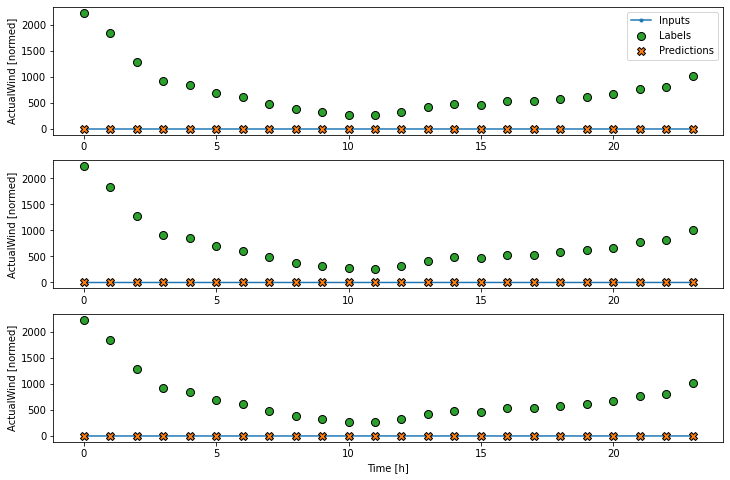

In [69]:
#
''''''
def plot(self, model=None, plot_col=predCol[0], max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    print(n)
    plt.plot(self.input_indices, inputs[n, :, plot_col_index-1],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    if (label_col_index == 0):
        plt.scatter(self.label_indices,  labels[:],
            edgecolors='k', label='Labels', c='#2ca02c', s=64)
    else:
        plt.scatter(self.label_indices, labels[n, :, label_col_index-1][:-1],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot



INPUT_WIDTH = 24
wide_conv_window = WindowGenerator(
    input_width=24,
    label_width=0,
    shift=0,
    label_columns=predCol)
    
conv_window

wide_conv_window

wide_conv_window.plot(conv_model)


In [70]:
usedCols=['sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_temp','dub_msl',
    'don_wddir','don_wdsp','don_temp','don_msl',
    'cla_wddir','cla_wdsp','cla_temp','cla_msl',
    'cor_wddir','cor_wdsp','cor_temp','cor_msl','ActualWind']


train_df_with_predCol = train_transformed[usedCols]
val_df_with_predCol = valid_transformed[usedCols]
test_df_with_predCol= test_transformed[usedCols]

In [71]:

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df_with_predCol, val_df=val_df_with_predCol, test_df=test_df_with_predCol,
               label_columns=None):
    # Store the raw data.
    self.train_df_with_predCol = train_df_with_predCol
    self.val_df_with_predCol = val_df_with_predCol
    self.test_df_with_predCol= test_df_with_predCol
    
    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df_with_predCol.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]
    print("self.input_indices are given by ",self.input_indices)
    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

##----------------------->
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=0,
    shift=0,
    label_columns=predCol[0])

conv_window

##----------------------->

@property
def train(self):
  return self.make_dataset(self.train_df_with_predCol)


@property
def trainX(self):
  return self.make_dataset(self.train_df_with_predColX)

@property
def trainY(self):
  return self.make_dataset(self.train_df_with_predColY)


@property
def val(self):
  return self.make_dataset(self.val_df_with_predCol)

@property
def valX(self):
  return self.make_dataset(self.val_df_with_predColX)

@property
def valY(self):
  return self.make_dataset(self.val_df_with_predColY)

@property
def test(self):
  return self.make_dataset(self.test_df_with_predCol)

@property
def testX(self):
  return self.make_dataset(self.test_df3X)

@property
def testY(self):
  return self.make_dataset(self.test_df3Y)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train

WindowGenerator.val = val


WindowGenerator.test = test



WindowGenerator.example = example
###================================>

def split_window(self, features):
    print("self.input_slice is ",self.input_slice)
    print("self.labels_slice is ",self.labels_slice)
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    print("labels are given by", labels)
    print("inputs are given by", inputs)

    '''if self.label_columns is not None:
        labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)'''

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    print("labels are now given by", labels)
    print("inputs are now given by", inputs)
    return inputs, labels

WindowGenerator.split_window = split_window

###================================>

def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    print("Data is  given by",data.shape)
    
    inputData=data[:,:20]
    targets=data[:,20:]
    print("Input data is given by", inputData.shape)
    print("targets are given by",targets.shape)

    ds = tf.keras.utils.timeseries_dataset_from_array(
        inputData,
        targets,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        batch_size=24,)
    print("ds is given by ",ds)
    #ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

###================================>

MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience,mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
  print(window.train)
  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

###================================>

conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,kernel_size=(CONV_WIDTH-1,),activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])
###================================>

history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

Data is  given by (7053, 21)
Input data is given by (7053, 20)
targets are given by (7053, 1)
ds is given by  <BatchDataset element_spec=(TensorSpec(shape=(None, None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
294/294 [==============================] - 2s 6ms/step - loss: 232357.3750 - mean_absolute_error: 367.5813
Data is  given by (2207, 21)
Input data is given by (2207, 20)
targets are given by (2207, 1)
ds is given by  <BatchDataset element_spec=(TensorSpec(shape=(None, None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


In [72]:
wide_conv_window

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label column name(s): ['ActualWind']

### Transforming new data for the model

### Saving the model in a directory

In [73]:
conv_model.save('models/conv_model')

INFO:tensorflow:Assets written to: models/conv_model/assets


INFO:tensorflow:Assets written to: models/conv_model/assets


## Comparing baselines - Predicting wind power

In [74]:
train_df_with_predCol = train_transformed[allCols+predCol]
val_df_with_predCol = valid_transformed[allCols+predCol]
test_df_with_predCol= train_transformed[allCols+predCol]

#Resetting the Actual Generation to be non-continuous
train_df_with_predCol[predCol]=train_df_with_predCol[predCol]*train_std[predCol]+train_mean[predCol]
val_df_with_predCol[predCol]=val_df_with_predCol[predCol]*train_std[predCol]+train_mean[predCol]
test_df_with_predCol[predCol]=test_df_with_predCol[predCol]*train_std[predCol]+train_mean[predCol]
#og

/tmp/ipykernel_205743/2079058221.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_with_predCol[predCol]=train_df_with_predCol[predCol]*train_std[predCol]+train_mean[predCol]
/tmp/ipykernel_205743/2079058221.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df_with_predCol[predCol]=val_df_with_predCol[predCol]*train_std[predCol]+train_mean[predCol]
/tmp/ipykernel_205743/2079058221.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [75]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df_with_predCol, val_df=val_df_with_predCol, test_df=test_df_with_predCol,
               label_columns=None):
    # Store the raw data.
    self.train_df_with_predCol = train_df_with_predCol
    self.val_df_with_predCol = val_df_with_predCol
    self.test_df_with_predCol= test_df_with_predCol

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df_with_predCol.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]
    print("self.input_indices are given by ",self.input_indices)
    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

##----------------------->
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=0,
    shift=0,
    label_columns=predCol[0])

conv_window

##----------------------->

@property
def train(self):
  return self.make_dataset(self.train_df_with_predCol)


@property
def trainX(self):
  return self.make_dataset(self.train_df_with_predColX)

@property
def trainY(self):
  return self.make_dataset(self.train_df_with_predColY)


@property
def val(self):
  return self.make_dataset(self.val_df_with_predCol)

@property
def valX(self):
  return self.make_dataset(self.val_df_with_predColX)

@property
def valY(self):
  return self.make_dataset(self.val_df_with_predColY)

@property
def test(self):
  return self.make_dataset(self.test_df_with_predCol)

@property
def testX(self):
  return self.make_dataset(self.test_df3X)

@property
def testY(self):
  return self.make_dataset(self.test_df3Y)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train

WindowGenerator.val = val


WindowGenerator.test = test



WindowGenerator.example = example
###================================>

def split_window(self, features):
    print("self.input_slice is ",self.input_slice)
    print("self.labels_slice is ",self.labels_slice)
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    print("labels are given by", labels)
    print("inputs are given by", inputs)

    '''if self.label_columns is not None:
        labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)'''

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    print("labels are now given by", labels)
    print("inputs are now given by", inputs)
    return inputs, labels

WindowGenerator.split_window = split_window

###================================>

def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    print("Data is  given by",data.shape)
    
    inputData=data[:,:20]
    targets=data[:,20:]
    print("Input data is given by", inputData.shape)
    print("targets are given by",targets.shape)

    ds = tf.keras.utils.timeseries_dataset_from_array(
        inputData,
        targets,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        batch_size=32,)
    print("ds is given by ",ds)
    #ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

###================================>

MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience,mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
  print(window.train)
  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

###================================>

conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,kernel_size=(CONV_WIDTH-1,),activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])
###================================>

history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

Data is  given by (7053, 21)
Input data is given by (7053, 20)
targets are given by (7053, 1)
ds is given by  <BatchDataset element_spec=(TensorSpec(shape=(None, None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
221/221 [==============================] - 2s 8ms/step - loss: 1239428235264.0000 - mean_absolute_error: 864057.5625
Data is  given by (19674, 21)
Input data is given by (19674, 20)
targets are given by (19674, 1)
ds is given by  <BatchDataset element_spec=(TensorSpec(shape=(None, None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


Data is  given by (7053, 21)
Input data is given by (7053, 20)
targets are given by (7053, 1)
ds is given by  <BatchDataset element_spec=(TensorSpec(shape=(None, None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
221/221 [==============================] - 2s 8ms/step
7051
7051
7051
7053
7051


/tmp/ipykernel_205743/3348885575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df_with_predColPlot['forecasted']=y_forecasted
/tmp/ipykernel_205743/3348885575.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df_with_predColPlot['predicted']=y_pred


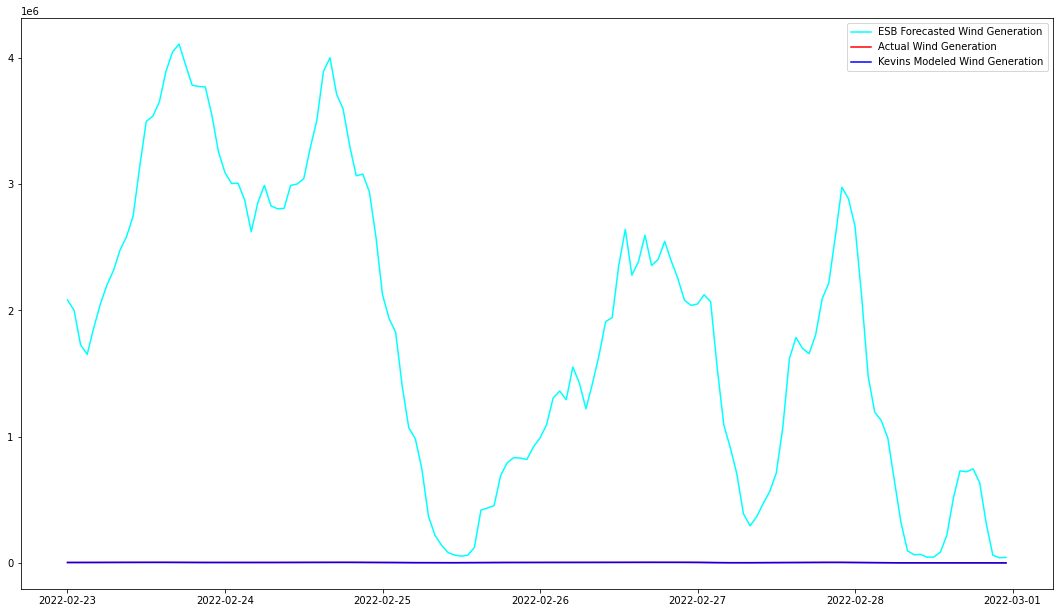

In [76]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

# Creating predicted column
y_predAr=conv_model.predict(conv_window.val)
y_pred=y_predAr[:,0]



# Setting the values
y_valid =        valid_transformed[predCol].iloc[2:]
y_forecasted = validSet['ForecastWind'].iloc[2:]

val_df_with_predColPlot=val_df_with_predCol.iloc[2:]

print(len(y_forecasted))
print(len(y_valid))
print(len(y_pred))
print(len(valid_transformed[predCol]))
print(len(val_df_with_predColPlot[predCol]))

val_df_with_predColPlot['forecasted']=y_forecasted

val_df_with_predColPlot['predicted']=y_pred

plt.plot(validSet['date2'][-6*24:],y_pred[-6*24:],color = 'cyan',label = 'ESB Forecasted Wind Generation')
plt.plot(validSet['date2'][-6*24:],y_valid[-6*24:],color = 'red',label = 'Actual Wind Generation')
plt.plot(validSet['date2'][-6*24:],y_forecasted[-6*24:],color = 'blue', label = 'Kevins Modeled Wind Generation')

plt.legend(loc=1)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

## Residual Analysis

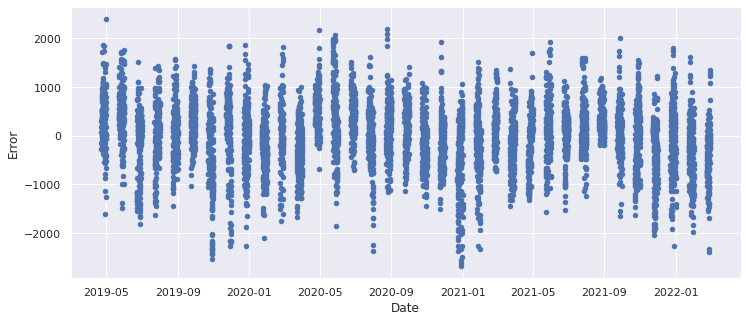

In [77]:
import seaborn as sns
# Plot validation set error
dataSet['error']= y_predRffBasic - y_validWind

#plt.title("Error Plot for the Random Forest model")
sns.set()
%matplotlib inline
dataSet.plot.scatter(x='date2', y='error', figsize=(12, 5))
plt.ylabel("Error")
plt.xlabel("Date")
plt.savefig(("MLImages/RFFError.png"))

In [78]:
type(y_predRffBasic)

numpy.ndarray

<AxesSubplot:xlabel='ActualWind', ylabel='errorRFF'>

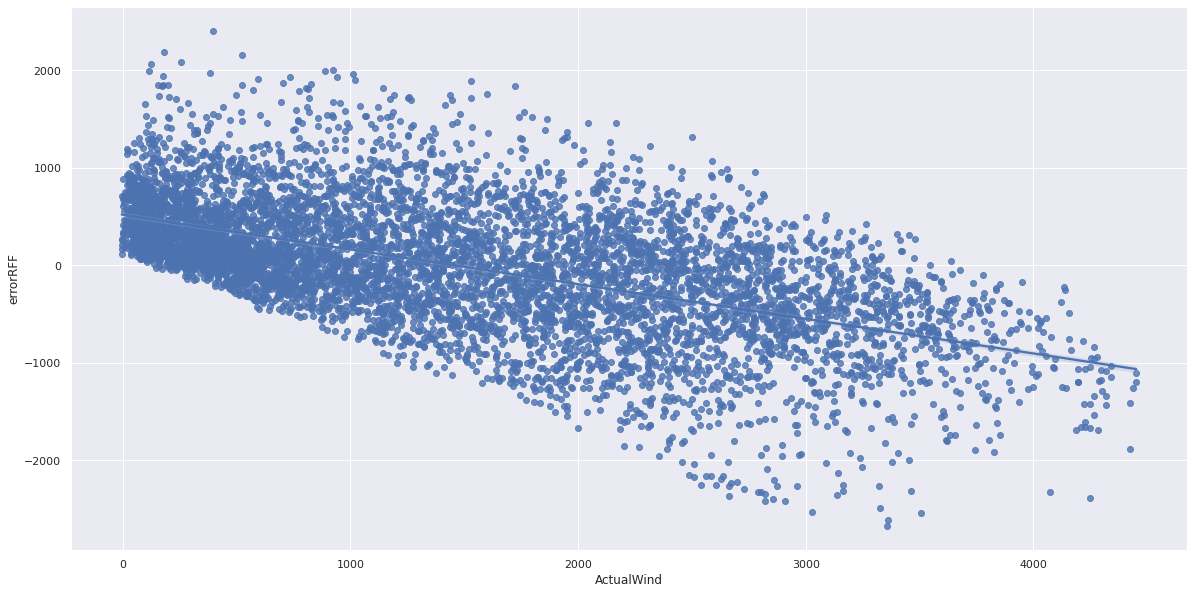

In [79]:
import seaborn as sns
# Plot validation set error
dataSet['errorRFF']= y_predRffBasic - validSet['ActualWind']


#plt.title("Error Plot for the Random Forest model")
sns.set()
%matplotlib inline
#dataSet.plot.scatter(x='ActualWind', y='errorRFF', figsize=(40, 10))
sns.set(rc={'figure.figsize':(20,10)})
sns.regplot(x="ActualWind", y="errorRFF", data=dataSet)

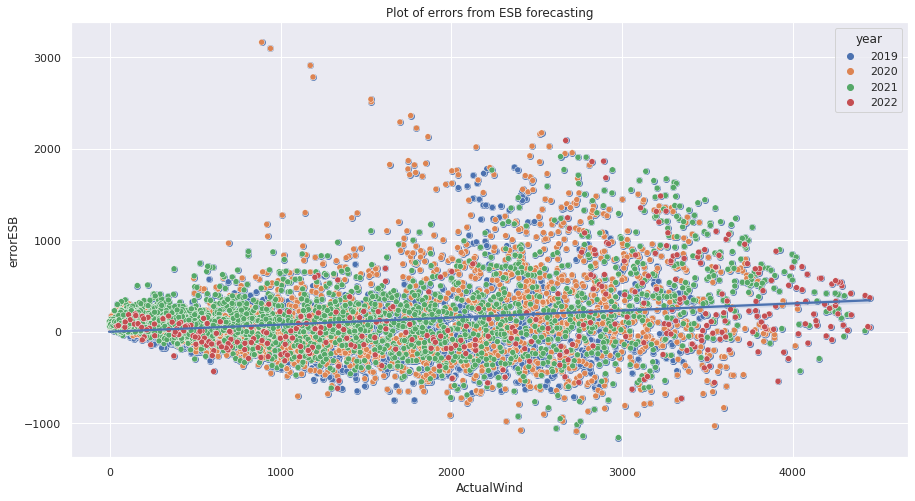

In [80]:
import seaborn as sns
# Plot validation set error

validSet['errorESB']= validSet['ForecastWind'] - validSet['ActualWind']


#plt.title("Error Plot for the Random Forest model")
sns.set()
%matplotlib inline
sns.set(rc={'figure.figsize':(15,8)})
sns_plot = sns.regplot(x="ActualWind", y="errorESB", data=validSet).set(title="Plot of errors from ESB forecasting")
scat = sns.scatterplot(x="ActualWind", y="errorESB", data=validSet, hue="year", palette="deep")
#figure = scat.get_figure()
plt.savefig("MLImages/esbError.png")
#dataSet.plot.scatter(x='ActualWind', y='errorESB', figsize=(40, 10))

In [81]:
dataSet['error'].describe()

count    7053.000000
mean       -5.601356
std       654.922747
min     -2672.465000
25%      -399.570000
50%        55.082500
75%       406.590000
max      2397.760000
Name: error, dtype: float64

/tmp/ipykernel_205743/2972804353.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validSetMutli['errorANNMulti']= np.ravel(y_predANNMulti)- validSetMutli['ActualWind']


<AxesSubplot:xlabel='ActualWind', ylabel='errorANNMulti'>

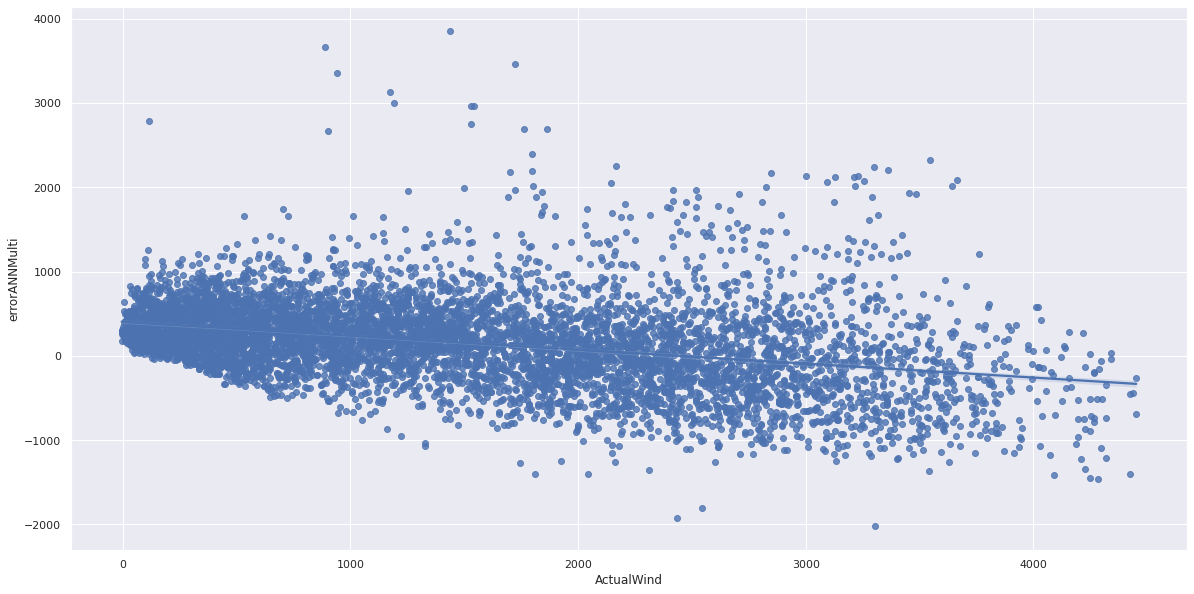

In [82]:
import seaborn as sns
# Plot validation set error

validSetMutli = validSet[1:]
validSetMutli['errorANNMulti']= np.ravel(y_predANNMulti)- validSetMutli['ActualWind']


#plt.title("Error Plot for the Random Forest model")
sns.set()
%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})
sns.regplot(x="ActualWind", y="errorANNMulti", data=validSetMutli)

#dataSet.plot.scatter(x='ActualWind', y='errorESB', figsize=(40, 10))

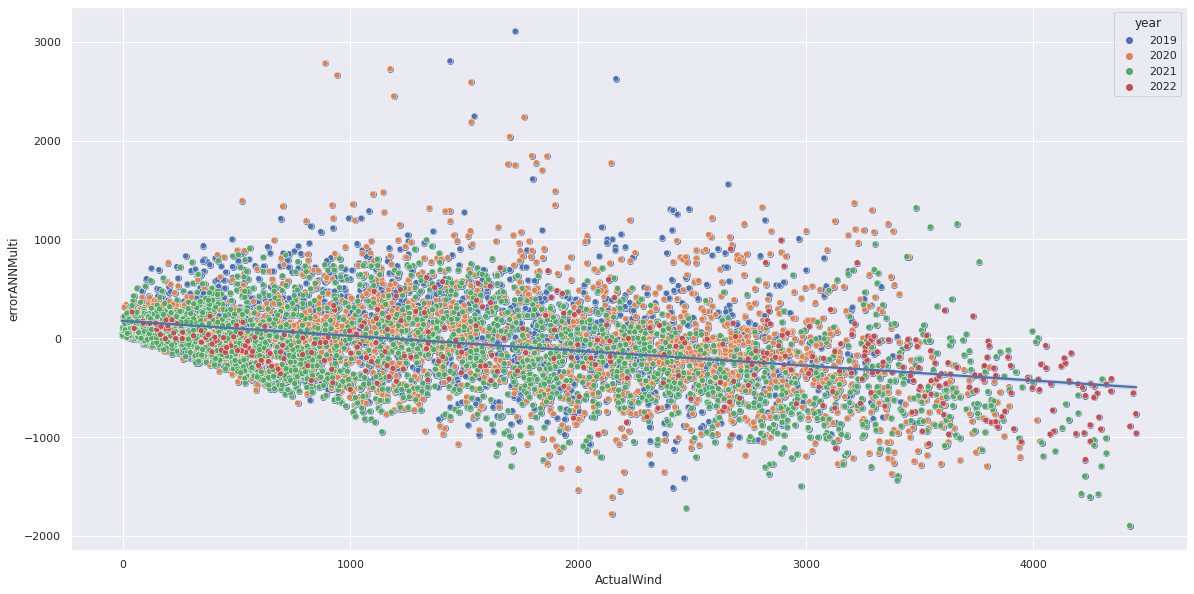

In [83]:
import seaborn as sns
# Plot validation set error


validSet['errorANNMulti']= np.ravel(y_predANN)- validSet['ActualWind']


#plt.title("Error Plot for the Random Forest model")
sns.set()
%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})
sns.color_palette("rocket", as_cmap=True)
sns.color_palette("pastel")
sns.regplot(x="ActualWind", y="errorANNMulti", data=validSet)
sns.scatterplot(x="ActualWind", y="errorANNMulti", data=validSet, hue="year", palette="deep")
#dataSet.plot.scatter(x='ActualWind', y='errorESB', figsize=(40, 10),palette = "deep",hue="date2")
plt.savefig("MLImages/annError.png")